In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
test=pd.read_csv('test.csv')
train=pd.read_csv("train.csv")
upload=pd.read_csv("sample_upload.csv")

In [4]:
train.head()
train['text_len'] = train['tweet'].apply(lambda x: len(x.split(' ')))

train.head()

,class,tweet,text_len
0,1,"[9-1-13] 2:50 pm ""son of a bitch ate my mac n ...",13
1,1,RT @BryceSerna: Don't be a pussy grab the boot...,15
2,2,RT @ClicquotSuave: bunch of rappers boutta flo...,12
3,2,@michigannews13 wow. Thats great language comi...,22
4,1,"and this is why I'm single, I don't fuck with ...",15


<AxesSubplot:xlabel='class', ylabel='count'>

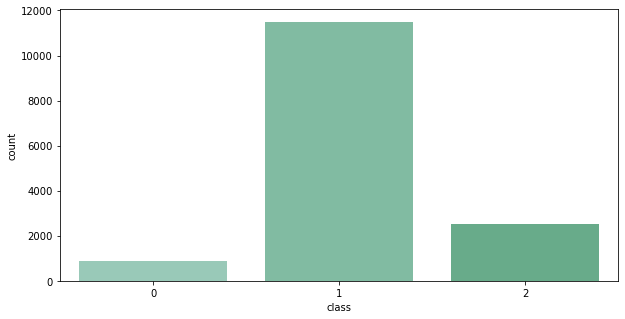

In [5]:
plt.figure(figsize=(10,5))
sns.set_palette(sns.color_palette("BuGn_d",8))
sns.countplot(x="class",data=train)

In [6]:
import re 
import string
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(
        'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 
        '', 
        text
    )
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('rt', '', text)
    
    text = remove_url(text)
    text = remove_emoji(text)
    text = remove_html(text)
    
    return text

In [7]:
#test the funcion
remove_emoji("Oh my god Another Earthquake 😔😔")

'Oh my god Another Earthquake '

In [8]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

stemmer = nltk.SnowballStemmer("english")


def preprocess_data(text):
    text = clean_text(text)
    text = ' '.join(stemmer.stem(word) for word in text.split(' ') if word not in stop_words)
    return text

In [9]:
test['tweet_clean'] = test['tweet'].apply(preprocess_data)
train['tweet_clean'] = train['tweet'].apply(preprocess_data)

train.head()

,class,tweet,text_len,tweet_clean
0,1,"[9-1-13] 2:50 pm ""son of a bitch ate my mac n ...",13,pm son bitch ate mac n chees
1,1,RT @BryceSerna: Don't be a pussy grab the boot...,15,bryceserna dont pussi grab booti love booti a...
2,2,RT @ClicquotSuave: bunch of rappers boutta flo...,12,clicquotsuav bunch rapper boutta flood intern...
3,2,@michigannews13 wow. Thats great language comi...,22,wow that great languag come hs coach sure rol...
4,1,"and this is why I'm single, I don't fuck with ...",15,singl dont fuck bitch attitud foh


In [10]:
def create_corpus_df(tweet, target):
    corpus=[]
    for x in tweet[tweet['class']==target]['tweet_clean'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [11]:
from collections import defaultdict
corpus_disaster_tweets = create_corpus_df(train, 1)

dic=defaultdict(int)

for word in corpus_disaster_tweets:
    dic[word]+=1
        
top_real=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
top_real

[('bitch', 6485),
 ('hoe', 2460),
 ('like', 1450),
 ('pussi', 1254),
 ('fuck', 1181),
 ('nigga', 1104),
 ('dont', 878),
 ('ass', 874),
 ('get', 857),
 ('shit', 736)]

In [12]:
corpus_disaster_tweets = create_corpus_df(train, 0)

dic=defaultdict(int)

for word in corpus_disaster_tweets:
    dic[word]+=1
        
top_real=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
top_real

[('bitch', 166),
 ('faggot', 143),
 ('fuck', 128),
 ('nigga', 120),
 ('like', 115),
 ('nigger', 92),
 ('ass', 73),
 ('fag', 66),
 ('trash', 66),
 ('white', 63)]

In [13]:
corpus_disaster_tweets = create_corpus_df(train, 2)

dic=defaultdict(int)
for word in corpus_disaster_tweets:
    dic[word]+=1
        
top_fake=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
top_fake

[('trash', 426),
 ('bird', 281),
 ('yanke', 207),
 ('like', 167),
 ('charli', 167),
 ('yellow', 146),
 ('get', 125),
 ('dont', 102),
 ('one', 97),
 ('amp', 90)]

In [14]:
x = train['tweet_clean']
y = train['class']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,train_size=0.75)

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

11151 11151
3718 3718


Pipeline (XGB)
======

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=100,
        use_label_encoder=False,
        eval_metric='auc',
    ))
])

from sklearn import metrics

# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))


Train: 0.9181239350730876
Test: 0.899677245831092


In [16]:
test_pred_pipeXGB=pipe.predict(test["tweet_clean"])
test_pred_pipeXGB

array([1, 2, 1, ..., 1, 1, 2], dtype=int64)

In [17]:
upload_pipeXGB=upload
upload_pipeXGB["class"]=test_pred_pipeXGB
upload_pipeXGB=upload_pipeXGB.set_index("id")
upload_pipeXGB.to_csv("upload_pipeXGB.csv")


LSTM
======

In [18]:
train_lstm=train

train_lstm["class"].replace({0: 1}, inplace=True)
train_lstm["class"].replace({2: 0}, inplace=True)

train_lstm.head()


,class,tweet,text_len,tweet_clean
0,1,"[9-1-13] 2:50 pm ""son of a bitch ate my mac n ...",13,pm son bitch ate mac n chees
1,1,RT @BryceSerna: Don't be a pussy grab the boot...,15,bryceserna dont pussi grab booti love booti a...
2,0,RT @ClicquotSuave: bunch of rappers boutta flo...,12,clicquotsuav bunch rapper boutta flood intern...
3,0,@michigannews13 wow. Thats great language comi...,22,wow that great languag come hs coach sure rol...
4,1,"and this is why I'm single, I don't fuck with ...",15,singl dont fuck bitch attitud foh


In [19]:
train=pd.read_csv("train.csv")
train['tweet_clean'] = train['tweet'].apply(preprocess_data)
train.head()

,class,tweet,tweet_clean
0,1,"[9-1-13] 2:50 pm ""son of a bitch ate my mac n ...",pm son bitch ate mac n chees
1,1,RT @BryceSerna: Don't be a pussy grab the boot...,bryceserna dont pussi grab booti love booti a...
2,2,RT @ClicquotSuave: bunch of rappers boutta flo...,clicquotsuav bunch rapper boutta flood intern...
3,2,@michigannews13 wow. Thats great language comi...,wow that great languag come hs coach sure rol...
4,1,"and this is why I'm single, I don't fuck with ...",singl dont fuck bitch attitud foh


In [20]:
train_tweets = train_lstm['tweet_clean'].values
test_tweets = test['tweet_clean'].values
train_target = train_lstm['class'].values

In [21]:
from keras.preprocessing.text import Tokenizer


word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(test_tweets)
vocab_length_test = len(word_tokenizer.word_index) + 1
print(vocab_length_test)

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train_tweets)
vocab_length_train = len(word_tokenizer.word_index) + 1
print(vocab_length_train)


14224
18424


In [22]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

def show_metrics(pred_tag, y_test):
    print("F1-score: ", f1_score(pred_tag, y_test))
    print("Precision: ", precision_score(pred_tag, y_test))
    print("Recall: ", recall_score(pred_tag, y_test))
    print("Acuracy: ", accuracy_score(pred_tag, y_test))
    print("-"*50)
    print(classification_report(pred_tag, y_test))
    
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

In [23]:
from nltk import word_tokenize 

maxlength_train = max(train_tweets, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(maxlength_train))

from keras.preprocessing.sequence import pad_sequences

train_padded_sentences = pad_sequences(
    embed(train_tweets), 
    length_long_sentence, 
    padding='post'
)

test_padded_sentences = pad_sequences(
    embed(test_tweets), 
    length_long_sentence,
    padding='post'
)

train_padded_sentences

array([[ 4320,   277,     1, ...,     0,     0,     0],
       [ 6605,     7,     5, ...,     0,     0,     0],
       [ 1404,   627,   845, ...,     0,     0,     0],
       ...,
       [18420,    94,     1, ...,     0,     0,     0],
       [18421, 18422,    58, ...,     0,     0,     0],
       [18423,     7,    16, ...,     0,     0,     0]])

In [24]:
embeddings_dictionary = dict()
embedding_dim=100

with open('glove.6B.100d.txt',encoding="utf-8") as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions
        
embedding_matrix = np.zeros((vocab_length_train, embedding_dim))


for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33096999,  0.082649  ,  0.66940999, ...,  0.14552   ,
         0.096472  , -0.28279001],
       [-0.1644    , -0.27706   , -0.33697   , ...,  0.17838   ,
         0.67962003, -0.13873   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.0084675 ,  0.18178   , -0.14348   , ...,  0.43121001,
         0.12015   ,  1.08010006],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    train_target, 
    test_size=0.25
)

In [26]:
from keras.models import Sequential, Model
from keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPool1D,BatchNormalization, Dropout, Dense

def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence
    ))
    model.add(Bidirectional(LSTM(
        length_long_sentence, 
        return_sequences = True, 
        recurrent_dropout=0.2
    )))
    
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = glove_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 100)           1842400   
                                                                 
 bidirectional (Bidirectiona  (None, 25, 50)           25200     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                        

In [27]:
model=glove_lstm()

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 6,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/6
349/349 [==============================] - ETA: 0s - loss: 0.4727 - accuracy: 0.7932
Epoch 00001: val_loss improved from inf to 0.26513, saving model to model.h5
349/349 [==============================] - 10s 22ms/step - loss: 0.4727 - accuracy: 0.7932 - val_loss: 0.2651 - val_accuracy: 0.8451 - lr: 0.0010
Epoch 2/6
349/349 [==============================] - ETA: 0s - loss: 0.2787 - accuracy: 0.8579
Epoch 00002: val_loss improved from 0.26513 to 0.18492, saving model to model.h5
349/349 [==============================] - 7s 21ms/step - loss: 0.2787 - accuracy: 0.8579 - val_loss: 0.1849 - val_accuracy: 0.9271 - lr: 0.0010
Epoch 3/6
349/349 [==============================] - ETA: 0s - loss: 0.2236 - accuracy: 0.8981
Epoch 00003: val_loss improved from 0.18492 to 0.16093, saving model to model.h5
349/349 [==============================] - 7s 21ms/step - loss: 0.2236 - accuracy: 0.8981 - val_loss: 0.1609 - val_accuracy: 0.9263 - lr: 0.0010
Epoch 4/6
349/349 [=====================

<AxesSubplot:ylabel='count'>

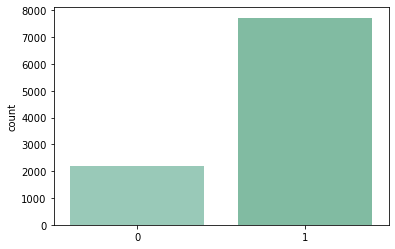

In [28]:
test_preds_ltsm=model.predict(test_padded_sentences)

test_preds_ltsm
pred_test_f=[]
for i in test_preds_ltsm:
    if i < 0.7:
        pred_test_f.append(0)
    else:
        pred_test_f.append(1)
        
sns.countplot(x=pred_test_f)

In [29]:
upload_ltsm=upload
test_ltsm=test
upload_ltsm["class"]=pred_test_f
test_ltsm["class"]=pred_test_f
upload_ltsm=upload_ltsm.set_index("id")
upload_ltsm["class"].replace({0: 2}, inplace=True)
upload_ltsm
test_hateoff=test_ltsm[test_ltsm["class"] ==1]
test_hateoff

,id,tweet,tweet_clean,class
0,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,urkindofbrand dawg ever fuck bitch sta cri...,1
2,2,"!!!!!!""@__BrighterDays: I can not just sit up ...",brighterday sit hate anoth bitch got much shi...,1
3,3,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,caus tire big bitch come us skinni,1
5,5,""" Keeks is a bitch she curves everyone "" lol I...",keek bitch curv everyon lol walk convers lik...,1
6,6,""" So hoes that smoke are losers ? "" yea ... go...",hoe smoke loser yea go ig,1
...,...,...,...,...
9906,9906,"you lil dumb ass bitch, i ain't fuckin wit chu...",lil dumb ass bitch aint fuckin wit chu got mil...,1
9908,9908,"you worried bout other bitches, you need me for?",worri bout bitch need,1
9909,9909,you're all niggers,your nigger,1
9911,9911,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like aint fuck...,1


LSTM (off and hateful)
====================

In [30]:

train_hateoff=train[train["class"] != 2]

train_tweets_hateoff = train_hateoff['tweet_clean'].values
test_tweets_hateoff = test_hateoff['tweet_clean'].values
train_target = train_hateoff['class'].values

<AxesSubplot:ylabel='count'>

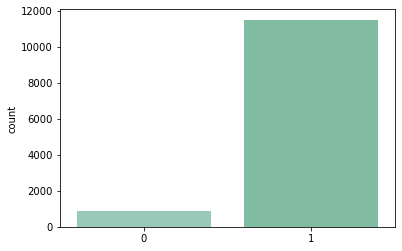

In [42]:
sns.countplot(x=train_target)


In [32]:
train.head()

,class,tweet,tweet_clean
0,1,"[9-1-13] 2:50 pm ""son of a bitch ate my mac n ...",pm son bitch ate mac n chees
1,1,RT @BryceSerna: Don't be a pussy grab the boot...,bryceserna dont pussi grab booti love booti a...
2,2,RT @ClicquotSuave: bunch of rappers boutta flo...,clicquotsuav bunch rapper boutta flood intern...
3,2,@michigannews13 wow. Thats great language comi...,wow that great languag come hs coach sure rol...
4,1,"and this is why I'm single, I don't fuck with ...",singl dont fuck bitch attitud foh


In [33]:
from keras.preprocessing.text import Tokenizer


word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(test_tweets_hateoff)
vocab_length_test = len(word_tokenizer.word_index) + 1
print(vocab_length_test)

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train_tweets_hateoff)
vocab_length_train = len(word_tokenizer.word_index) + 1
print(vocab_length_train)


10764
14802


In [34]:
from nltk import word_tokenize 

maxlength_train = max(train_tweets_hateoff, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(maxlength_train))

from keras.preprocessing.sequence import pad_sequences

train_padded_sentences = pad_sequences(
    embed(train_tweets_hateoff), 
    length_long_sentence, 
    padding='post'
)

test_padded_sentences = pad_sequences(
    embed(test_tweets_hateoff), 
    length_long_sentence,
    padding='post'
)

train_padded_sentences

array([[ 5363,   245,     1, ...,     0,     0,     0],
       [ 5364,     8,     5, ...,     0,     0,     0],
       [  303,     8,     4, ...,     0,     0,     0],
       ...,
       [14798,    89,     1, ...,     0,     0,     0],
       [14799, 14800,    54, ...,     0,     0,     0],
       [14801,     8,    14, ...,     0,     0,     0]])

In [35]:
embeddings_dictionary = dict()
embedding_dim=100

with open('glove.6B.100d.txt',encoding="utf-8") as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions
        
embedding_matrix = np.zeros((vocab_length_train, embedding_dim))


for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33096999,  0.082649  ,  0.66940999, ...,  0.14552   ,
         0.096472  , -0.28279001],
       [-0.1644    , -0.27706   , -0.33697   , ...,  0.17838   ,
         0.67962003, -0.13873   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.0084675 ,  0.18178   , -0.14348   , ...,  0.43121001,
         0.12015   ,  1.08010006],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    train_target, 
    test_size=0.25
)

In [37]:
from keras.models import Sequential, Model
from keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPool1D,BatchNormalization, Dropout, Dense

def glove_lstm2():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence
    ))
    model.add(Bidirectional(LSTM(
        length_long_sentence, 
        return_sequences = True, 
        recurrent_dropout=0.2
    )))
    
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = glove_lstm()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 23, 100)           1480200   
                                                                 
 bidirectional_2 (Bidirectio  (None, 23, 46)           22816     
 nal)                                                            
                                                                 
 global_max_pooling1d_2 (Glo  (None, 46)               0         
 balMaxPooling1D)                                                
                                                                 
 batch_normalization_2 (Batc  (None, 46)               184       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 46)                0         
                                                      

In [38]:
model=glove_lstm2()

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 2,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/2
288/290 [============================>.] - ETA: 0s - loss: 0.3669 - accuracy: 0.8978
Epoch 00001: val_loss improved from inf to 0.30381, saving model to model.h5
290/290 [==============================] - 9s 21ms/step - loss: 0.3657 - accuracy: 0.8982 - val_loss: 0.3038 - val_accuracy: 0.9246 - lr: 0.0010
Epoch 2/2
289/290 [============================>.] - ETA: 0s - loss: 0.2777 - accuracy: 0.9308
Epoch 00002: val_loss improved from 0.30381 to 0.22216, saving model to model.h5
290/290 [==============================] - 6s 20ms/step - loss: 0.2775 - accuracy: 0.9308 - val_loss: 0.2222 - val_accuracy: 0.9246 - lr: 0.0010


<AxesSubplot:ylabel='count'>

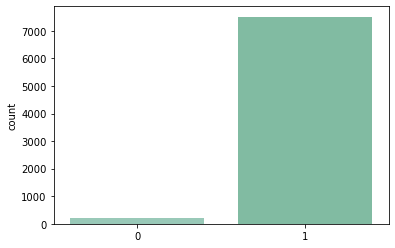

In [39]:
test_preds_ltsm_hateoff=model.predict(test_padded_sentences)

test_preds_ltsm_hateoff
pred_test_f_hateoff=[]
for i in test_preds_ltsm_hateoff:
    if i < 0.7:
        pred_test_f_hateoff.append(0)
    else:
        pred_test_f_hateoff.append(1)
        
sns.countplot(x=pred_test_f_hateoff)

In [40]:
upload_ltsm


test_hateoff["class_hate"]=pred_test_f_hateoff
test_hateoff

<ipython-input-40-e4490329fcec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_hateoff["class_hate"]=pred_test_f_hateoff


,id,tweet,tweet_clean,class,class_hate
0,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,urkindofbrand dawg ever fuck bitch sta cri...,1,1
2,2,"!!!!!!""@__BrighterDays: I can not just sit up ...",brighterday sit hate anoth bitch got much shi...,1,1
3,3,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,caus tire big bitch come us skinni,1,1
5,5,""" Keeks is a bitch she curves everyone "" lol I...",keek bitch curv everyon lol walk convers lik...,1,1
6,6,""" So hoes that smoke are losers ? "" yea ... go...",hoe smoke loser yea go ig,1,1
...,...,...,...,...,...
9906,9906,"you lil dumb ass bitch, i ain't fuckin wit chu...",lil dumb ass bitch aint fuckin wit chu got mil...,1,1
9908,9908,"you worried bout other bitches, you need me for?",worri bout bitch need,1,1
9909,9909,you're all niggers,your nigger,1,1
9911,9911,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like aint fuck...,1,1


In [41]:
df1=test_hateoff[["id","class_hate"]]
df=pd.merge(upload_ltsm,df1,how="left",on="id")
df["class_hate"].fillna(2,inplace=True)
df.drop(columns=["class"],inplace=True)
df.rename(columns={"class_hate":"class"},inplace=True)
df=df.set_index("id")
df.to_csv("upload_ltsm.csv")